# Project 1: Predict Diamonds Price

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')

# Step 1: Understand The domain of the project:
# ------------------------------------------------------------------
**Answering the questions of how to make a baseline for the project**

P1. The objective of this project is to predict the diamonds price

P2. This is a superised learning project (Features: carat, cut, color, clarity, depth, table, x, y, z - Class: price)

P3. This is a regression problem since the Price attribute is Continuous Numerical value

P4. This is a model-based Online Learning: No need to create batch feed model (data is not very large, is not continuously updated)

**Define The performance metrics:**

P5. The performence measure used would be : MSE or RMSE depending on the existance of outliers

P6. The minimum performance needed for this model is according to the mean(price attribute)= 3932.799722

# Step 2: Understand Your dataset:
# -------------------------------------------------

In [3]:
df = pd.read_csv('diamonds.csv', index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


## 1) Content of dataset:
## ===================
- **price:** price in US dollars (\$326--\$18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)
- **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table:** width of top of diamond relative to widest point (43--95)

## 2) Understand the data Structure:
# ========================

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**From this info we understand that:**
- overall data points = 53940 row
- we have 7 numerical values (1 int: Price - 6 float) and 3 categorical attributes
- Data is complete in all attributes (NO NANs or Unknown Values)
- No need for the step of Data Cleaning

## (for categorical data):

In [5]:
cat_attributes= ['cut','color','clarity']
for att in cat_attributes:
    print(f'{att}:\n--------')
    res = df[att].value_counts()
    print(res)
    print('***********************************')


cut:
--------
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64
***********************************
color:
--------
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
***********************************
clarity:
--------
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
***********************************


Text(0.5, 1.0, 'clarity')

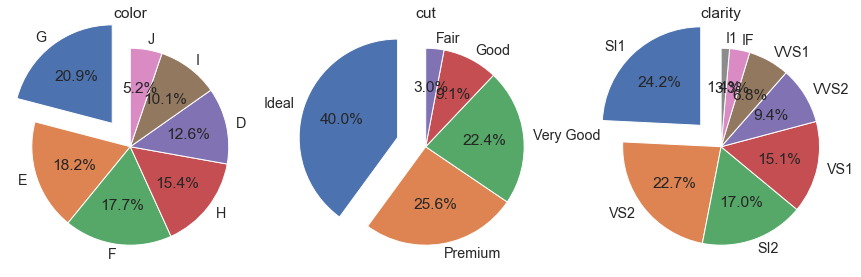

In [6]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
myExplode = [0.3, 0, 0, 0, 0, 0, 0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['color'].value_counts().values), labels=list(df['color'].value_counts().index) , explode= myExplode, autopct='%1.1f%%',
         startangle=90)
plt.title('color')
 

plt.subplot(1,3,2)
myExplode = [0.3, 0, 0, 0, 0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['cut'].value_counts().values), labels=list(df['cut'].value_counts().index) , explode= myExplode, autopct='%1.1f%%', startangle=90)
plt.title('cut')

plt.subplot(1,3,3)
myExplode = [0.3, 0, 0, 0, 0,0,0,0]
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['clarity'].value_counts().values), labels=list(df['clarity'].value_counts().index) , explode= myExplode, autopct='%1.1f%%',startangle=90)
plt.title('clarity')

Text(0.5, 1.0, 'clarity')

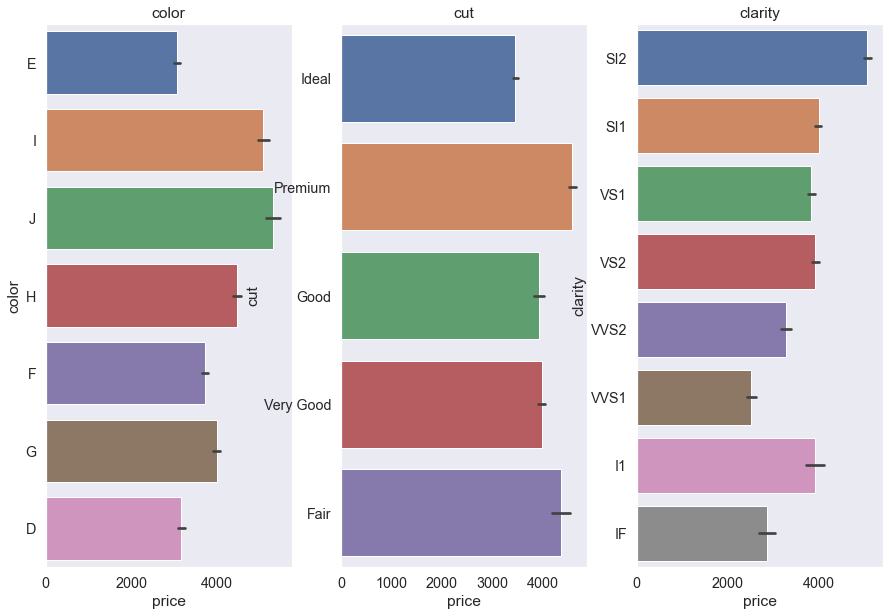

In [7]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
#sns.barplot(x=df['color'].value_counts())
sns.barplot(data=df, y='color', x='price')
plt.title('color')
 

plt.subplot(1,3,2)
sns.barplot(data=df, y='cut', x='price')
plt.title('cut')

plt.subplot(1,3,3)
sns.barplot(data=df, y='clarity', x='price')
plt.title('clarity')

This gave us insights about the frequency of each category in each of the categorical attributes

## (for numrical data):

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


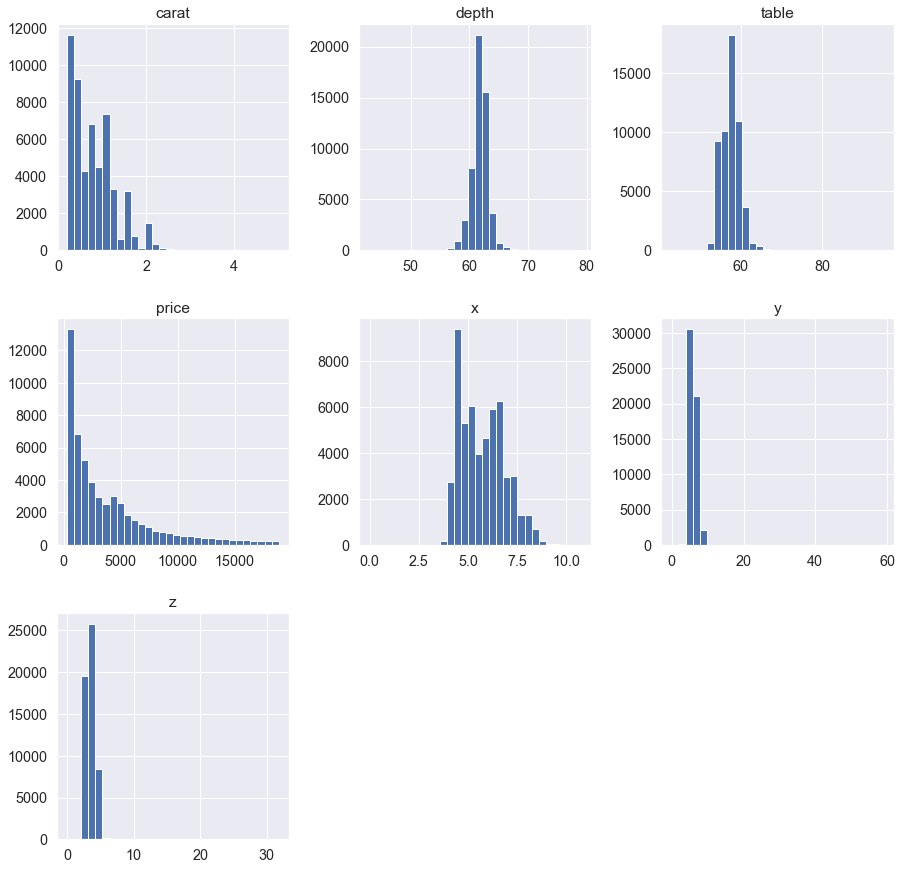

In [9]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
df.hist(bins=30)
plt.show()

C:\Users\abbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\abbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\abbas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

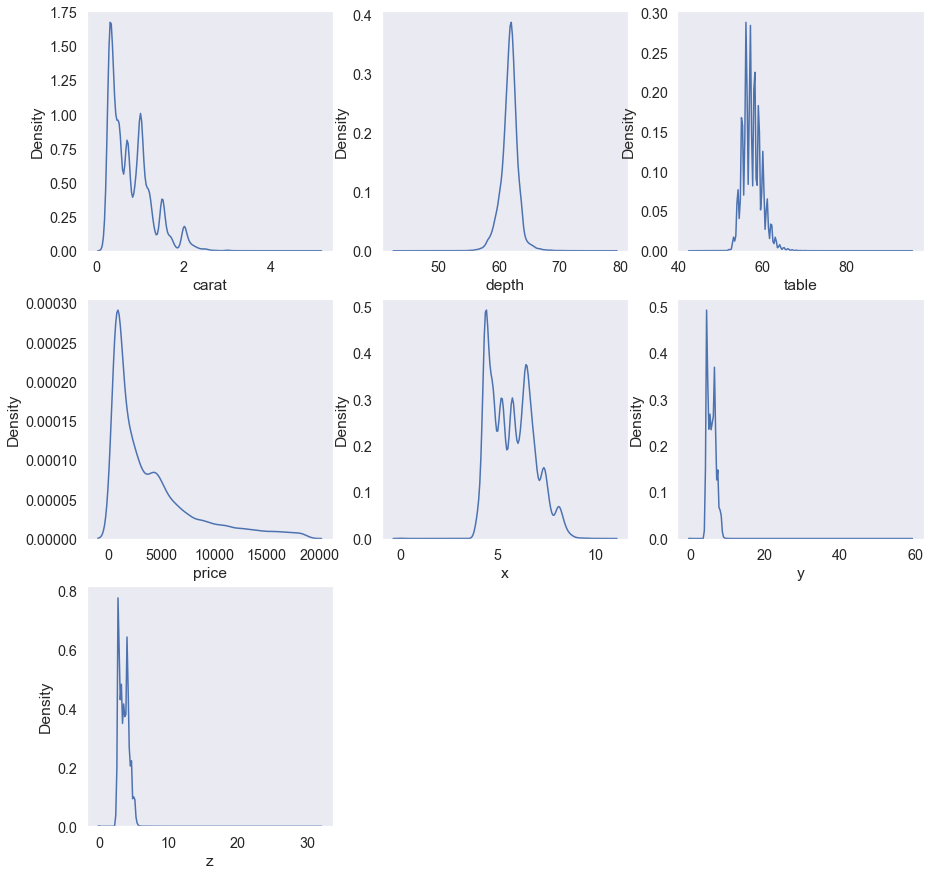

In [10]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
num_attr= ['carat','depth','table','price','x','y','z']
for i, att in zip(range(1,30),num_attr):
    plt.subplot(3,3,i)   
    sns.distplot(df[att],hist=False)

**from this we conclude:**
- **for carat:** most of diamonds range between 0 to 2 carats where the largest carat value is about 0.2
- **for depth:** this is a normal distribution mostly concentrated around nearly 62%
- **for table:** this is also considered as normal distribution except for the fact that there is variance in the values around the center
- **for the price:** it is mostly skewed left which meen that most diamons range between 0 to 500 USDs while small number is considered to be expensive (requires more investigation to know the most affecting attributes on the price)

- *according to all the histograms we can see that z, y, carat and price have all skewed left distributions (most probabiliy corolated)*

## 3) Visualize the data:
## ==================

Visualization techniques for both numerical and categorical attributes:

|  | **Numerical** | **Categorical** |
| --- | --- | --- |
| **Univariate** | distplot| countplot |
|  | Kdeplot |  |
|  |  |  |
| **MultiVariate** | jointplot | boxplot |
|  | pairplot | violinplot |
|  |  | striplot |
|  |  | swarmplot |
|  |  | barplot |

we already saw histogram of each numerical attribute so no need for distplot

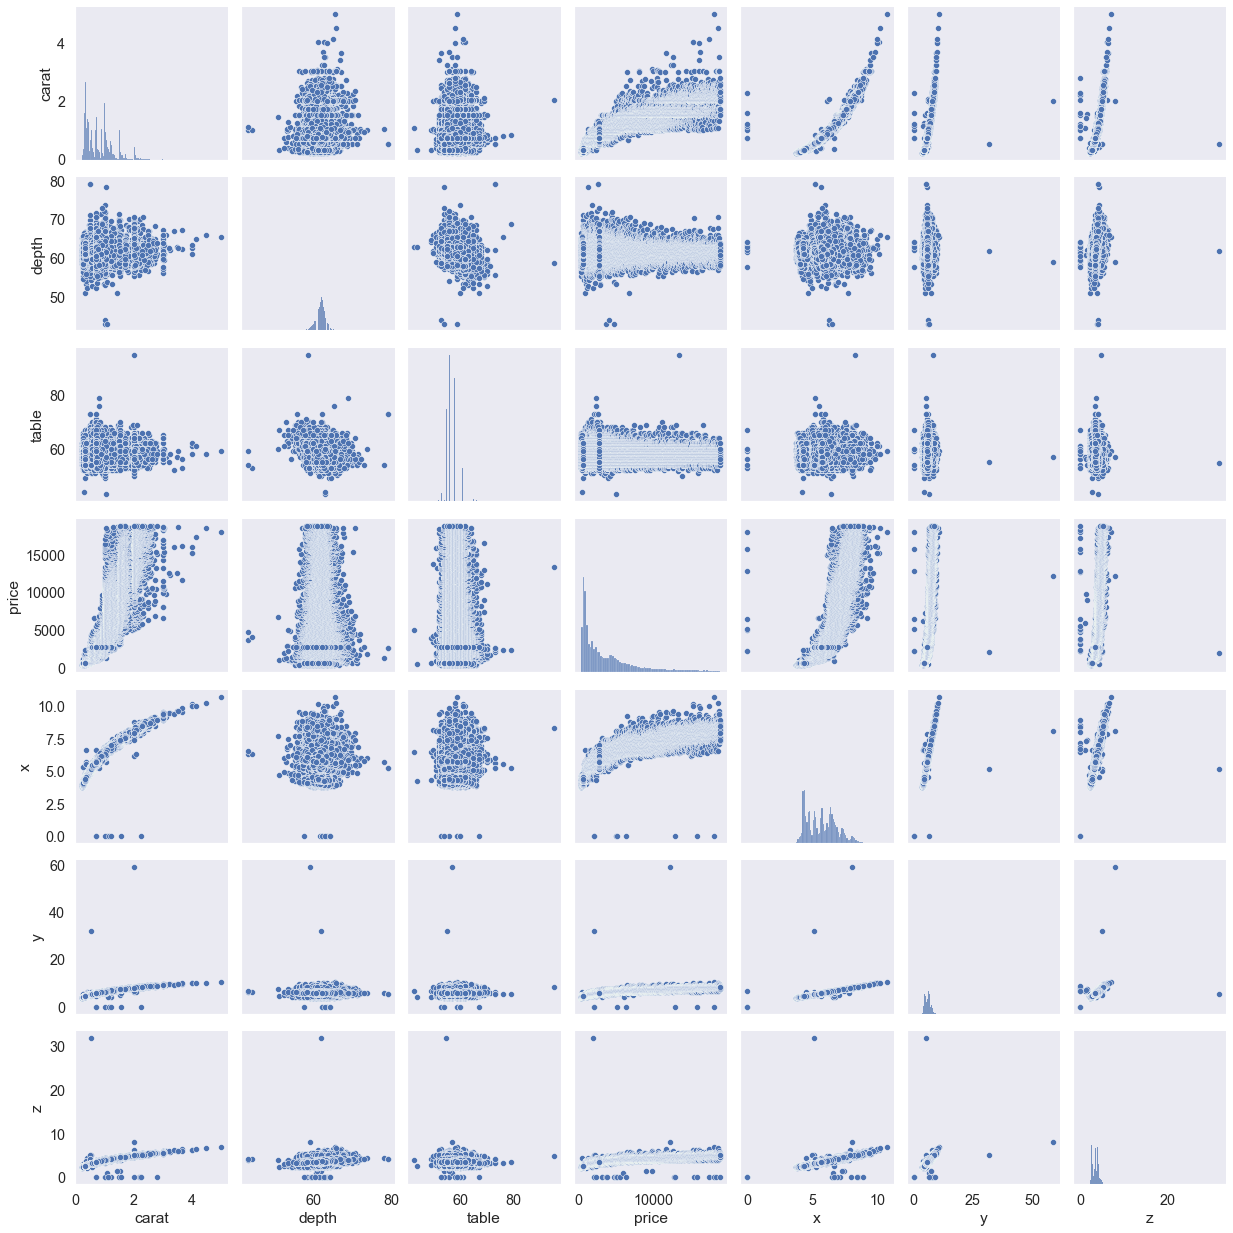

In [11]:
sns.color_palette("flare", as_cmap=True)
sns.pairplot(df)

the pair plot show the existance of outliersin the data (will use boxplot to investigate it further)

I then investigated the features related to dimensions: x,y,z, depth relative to the cut shape, color and clarity: 

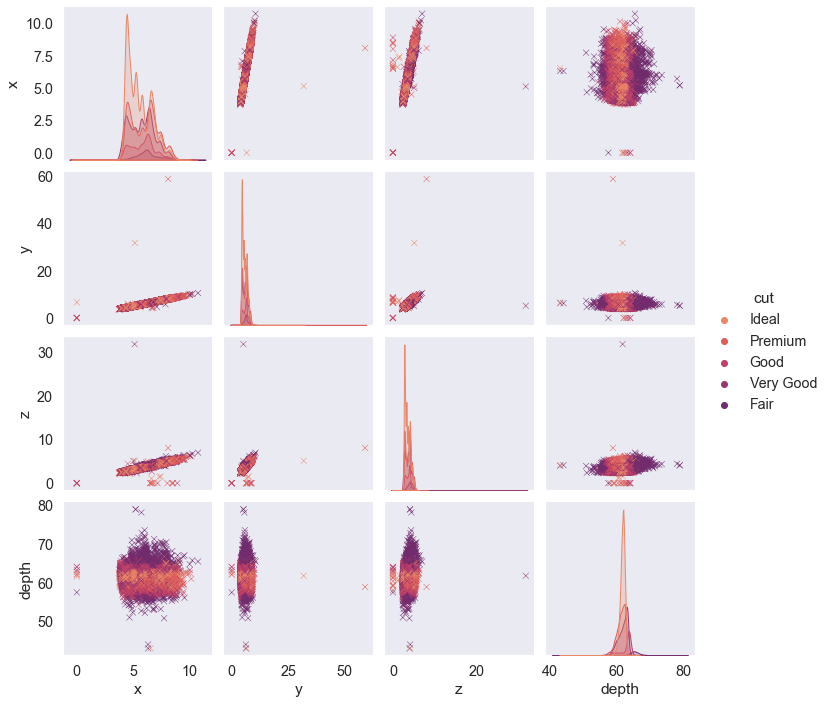

In [12]:
sns.color_palette("flare", as_cmap=True)
#sns.pairplot(df[['x','y','z','depth']], palette='flare', markers='x',hue=df['cut'])
sns.pairplot(data=df, vars=['x','y','z','depth'], palette='flare', hue='cut', markers='x')

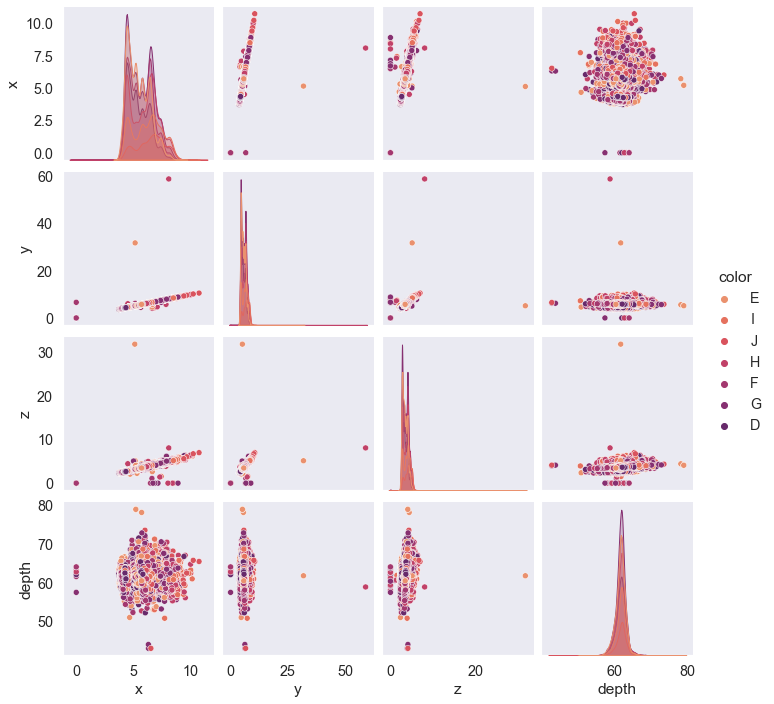

In [13]:
sns.pairplot(data=df, vars=['x','y','z','depth'], palette='flare', hue='color')#, markers='x')

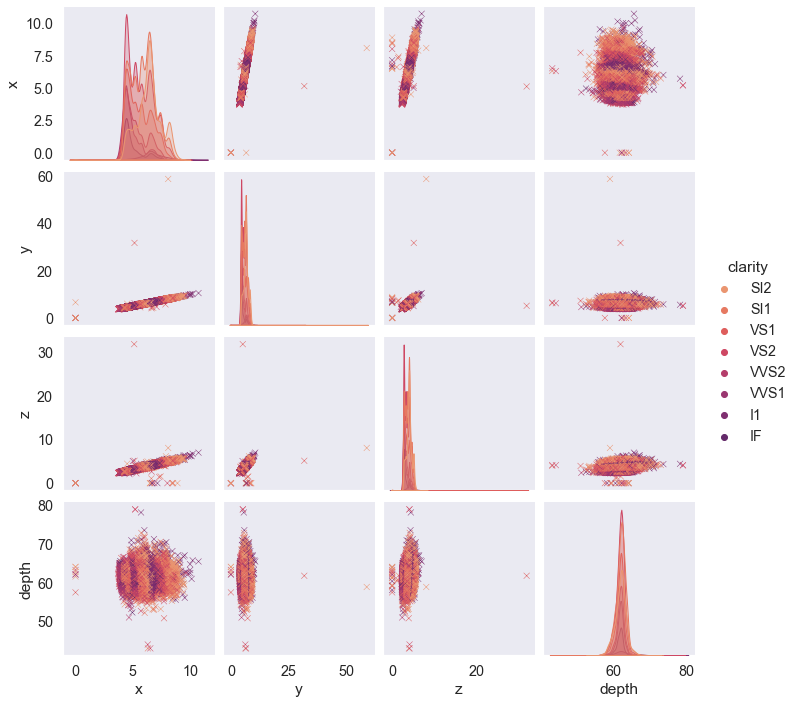

In [14]:
sns.pairplot(data=df, vars=['x','y','z','depth'], palette='flare', hue='clarity', markers='x')

<AxesSubplot:xlabel='price', ylabel='Count'>

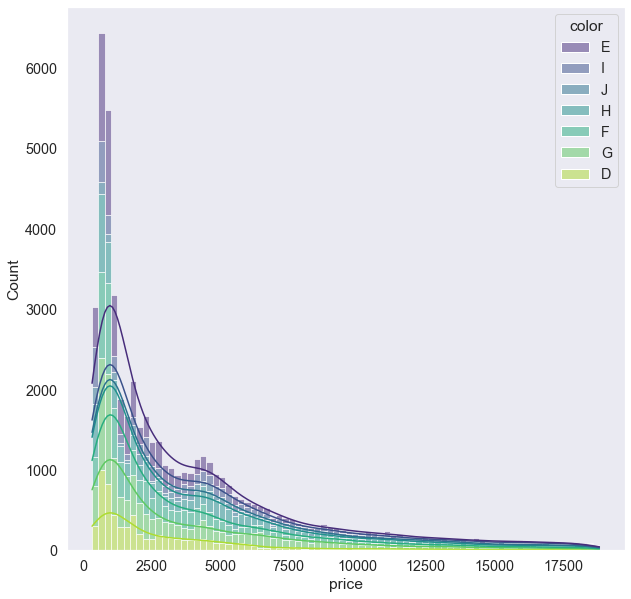

In [15]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='color', multiple="stack")

<AxesSubplot:xlabel='price', ylabel='Count'>

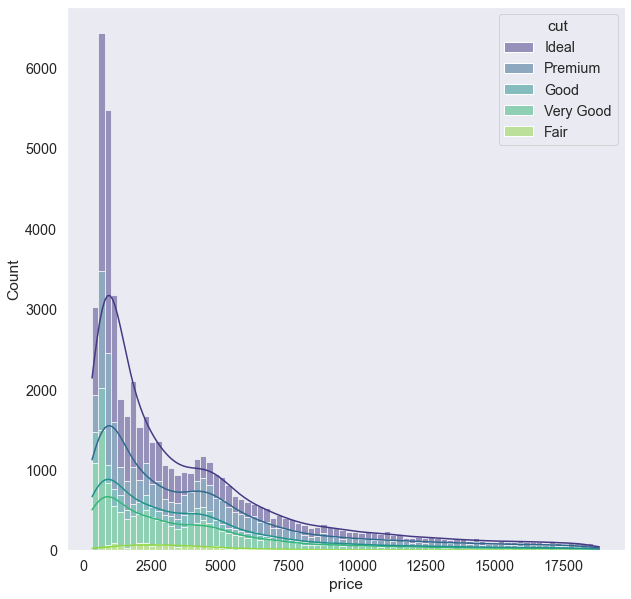

In [16]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='cut', multiple="stack")

<AxesSubplot:xlabel='price', ylabel='Count'>

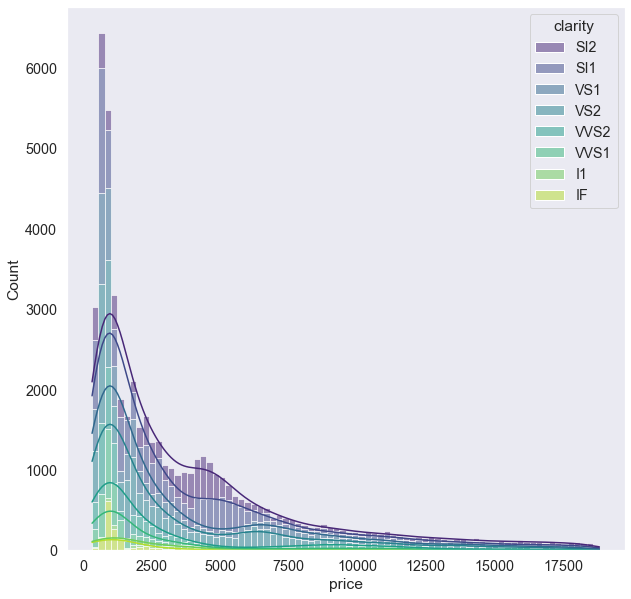

In [17]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='clarity', multiple="stack")

In [18]:
list(df['clarity'].value_counts().values)

[13067, 12259, 9194, 8171, 5066, 3655, 1790, 741]

In [19]:
list(df['color'].value_counts().index)

['G', 'E', 'F', 'H', 'D', 'I', 'J']

<AxesSubplot:>

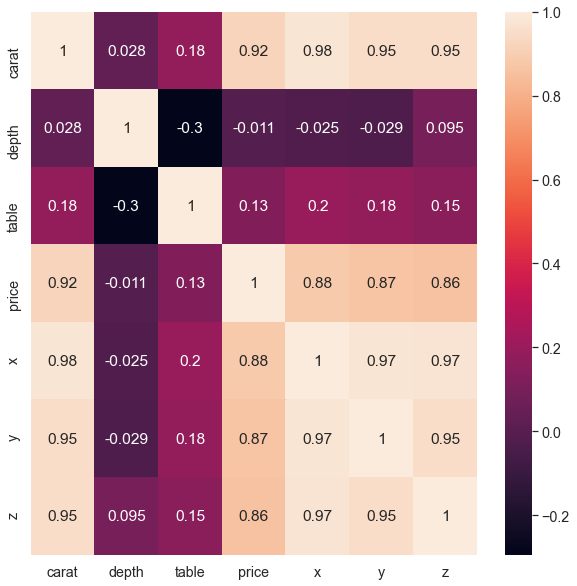

In [20]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.heatmap(data=df.corr(), cmap='rocket', annot=True)

most correlated attributes with price attribute are: carat, x,y,z

depth and table are not highly correlated with any of the other attributes

<AxesSubplot:xlabel='price', ylabel='color'>

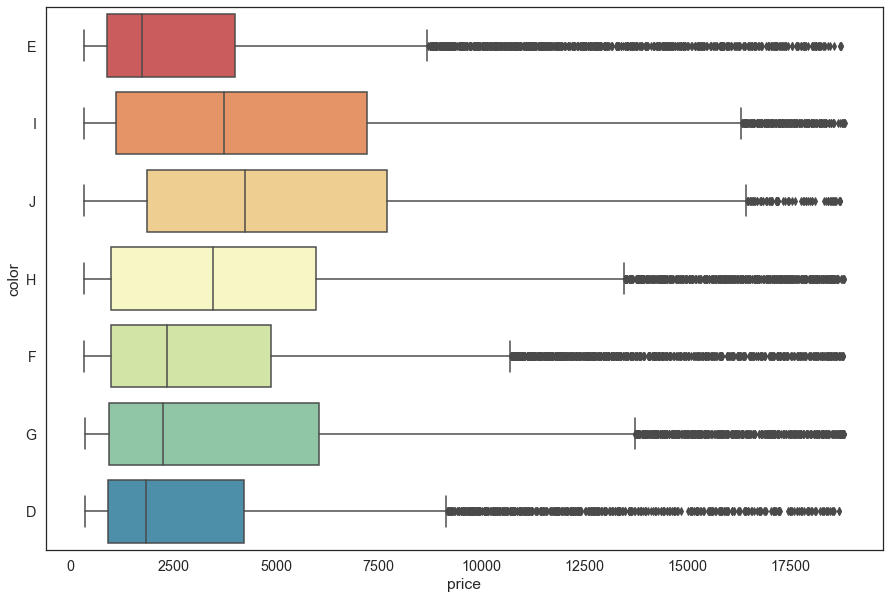

In [21]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.boxplot(data=df, x='price', y='color', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='color'>

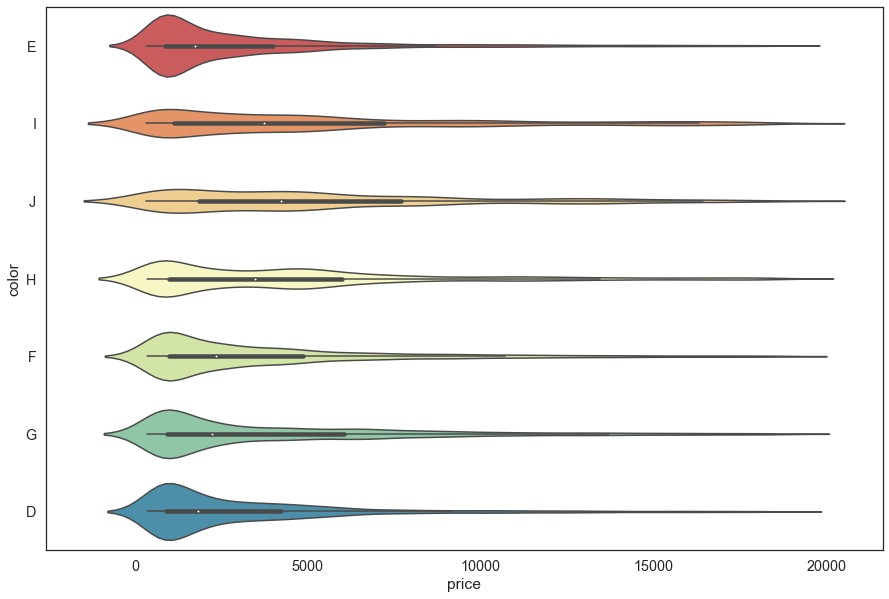

In [22]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.violinplot(data=df, x='price', y='color', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='cut'>

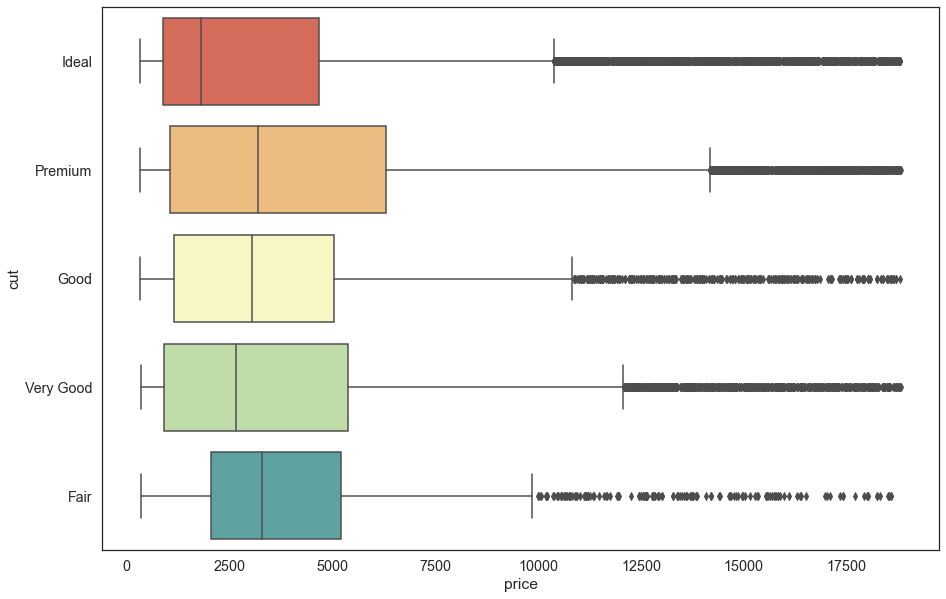

In [23]:
sns.boxplot(data=df, x='price', y='cut', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='cut'>

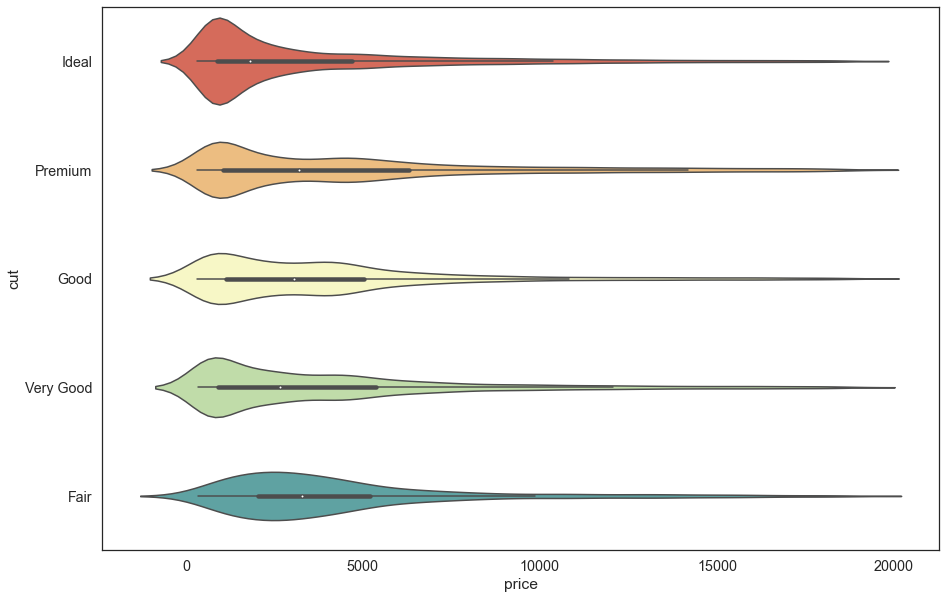

In [24]:
sns.violinplot(data=df, x='price', y='cut', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='clarity'>

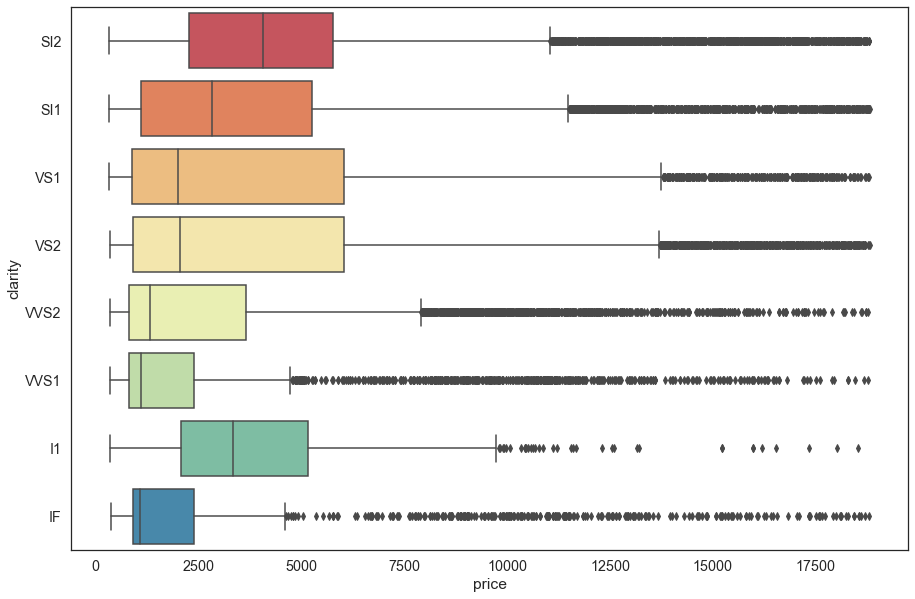

In [25]:
sns.boxplot(data=df, x='price', y='clarity', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='clarity'>

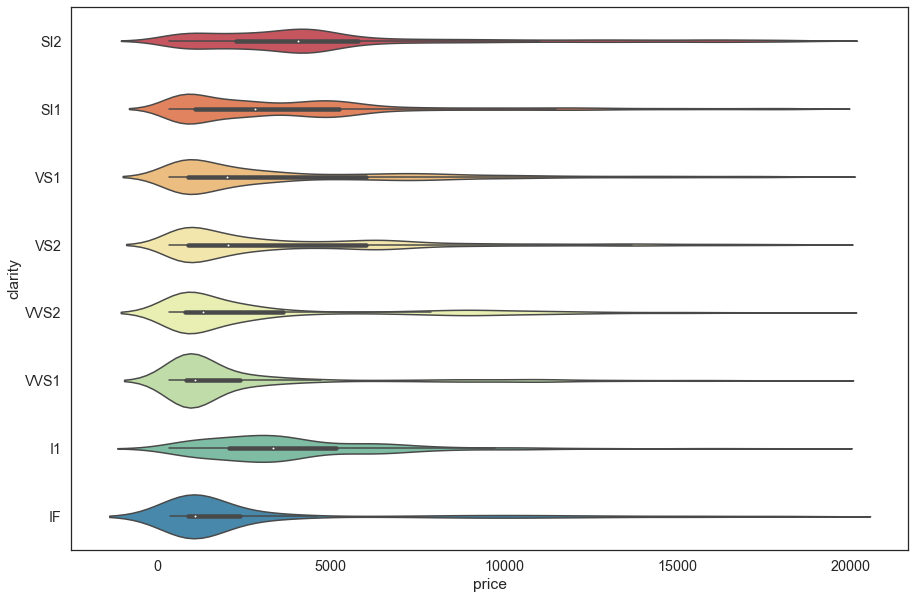

In [26]:
sns.violinplot(data=df, x='price', y='clarity', palette='Spectral')

## 4) Creating attribute combination for better visualization:

Pavilion depth: The pavilion depth percentage should range from 41-48%. Pavilions shallower than 41% will make the reflection pattern small and fragmented. This will give the diamond a messy look. Furthermore, the girdle reflection will appear as a "fish eye," an unattractive gray ring around the table facet.

Pavilion angle: The pavilion angle should range between 37.4 to 44°. Shallow angles might cause fish eyes, while steep angles make the stone look dark.

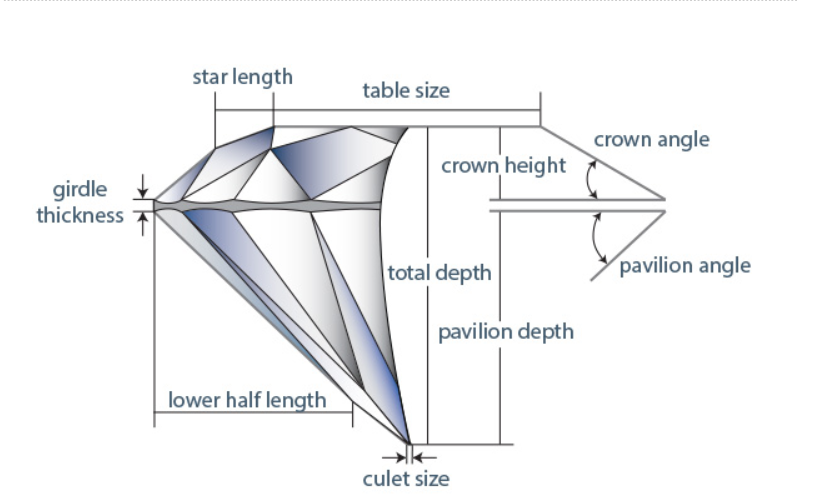

In [27]:
df['volume']=df['x']*df['y']*df['z'] # measured in mm cube
df['table_mm']= df['table']/100
df['diameter']=df['table']*df['y']/100  #df['y']*100/df['table'] 
df['depth_mm']=df['depth']/100
df['pavilion depth']=df['depth']-df['z'] # PD= height - depth in mm
df['pavilion angle']= np.tan(df['diameter']/df['pavilion depth']) #PA = tan(diameter / depth in mm)  # measured in degree

- **price:** price in US dollars (\$326--\$18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)
- **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table:** width of top of diamond relative to widest point (43--95)

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,table_mm,diameter,depth_mm,pavilion depth,pavilion angle
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.55,2.1890,0.615,59.07,0.037075
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.61,2.3424,0.598,57.49,0.040767
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.65,2.6455,0.569,54.59,0.048499
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.58,2.4534,0.624,59.77,0.041070
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.58,2.5230,0.633,60.55,0.041692


<AxesSubplot:>

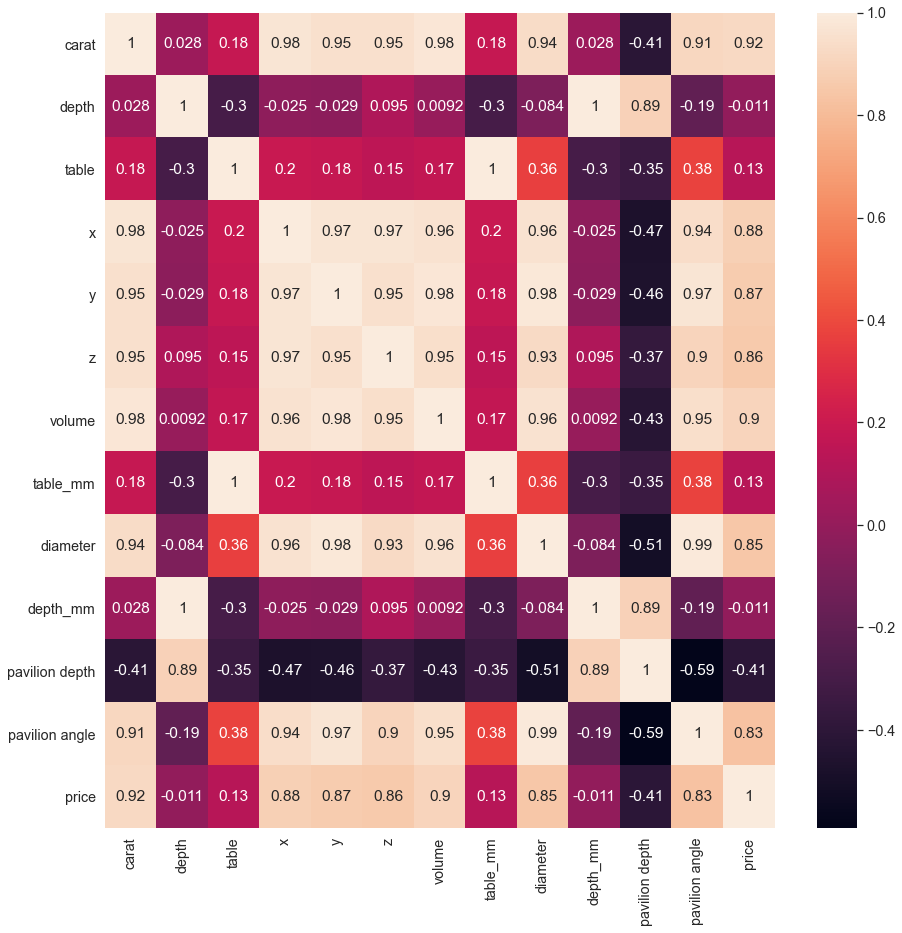

In [29]:
df = df[['carat','cut','color','clarity','depth','table','x','y','z','volume','table_mm','diameter','depth_mm','pavilion depth','pavilion angle','price']]
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
sns.heatmap(data=df.corr(), cmap='rocket', annot=True)

 **from this we conclude that:**
 - highly correlated attributes with price are: carat, x, y, z, volume, diameter, pivilion depth
 - attributes of less correlation: depth, table, table_mm, depth_mm , pavilion angle

# Step 3: Data preparation for ML algorithm:
# ------------------------------------------------------------

## 1) Data Cleaning:
## ===============
**it includes multiple steps:**
- **Getting rid of corresponding districts:** for Nan values - we have no nan values in this dataset - could also be used for outliers (not taken yet)
- **Getting rid of whole attribute:** in case of large numebr of nan values or bad effect (low correlation with the price attribute)
- **set unknown values (nan) to another value:** - not used here

### a) Get rid of whole attribute:
### = = = = = = = = = = = = = = = = 

In [30]:
df.drop(['depth','table','table_mm', 'depth_mm', 'pavilion angle'], axis=1, inplace=True)

C:\Users\abbas\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53943 non-null  float64
 1   cut             53943 non-null  object 
 2   color           53943 non-null  object 
 3   clarity         53943 non-null  object 
 4   x               53943 non-null  float64
 5   y               53943 non-null  float64
 6   z               53943 non-null  float64
 7   volume          53943 non-null  float64
 8   diameter        53943 non-null  float64
 9   pavilion depth  53943 non-null  float64
 10  price           53943 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


## 2) Handeling text and categorical data:

In [32]:
from sklearn.preprocessing import OneHotEncoder
df_cat_1 = df[['color']]
df_cat_2 = df[['cut']]
df_cat_3 = df[['clarity']]
cat_encoder = OneHotEncoder()
df2_1hot = cat_encoder.fit_transform(df_cat_1)
df2_2hot = cat_encoder.fit_transform(df_cat_2)
df2_3hot = cat_encoder.fit_transform(df_cat_3)

In [33]:
df_encoded_1 = pd.DataFrame(df2_1hot.toarray(), columns='color_'+df["color"].unique())
df_encoded_1.index=df_encoded_1.index+1
df_encoded_2 = pd.DataFrame(df2_2hot.toarray(), columns='cut_'+df["cut"].unique())
df_encoded_2.index=df_encoded_2.index+1
df_encoded_3 = pd.DataFrame(df2_3hot.toarray(), columns='clarity_'+df["clarity"].unique())
df_encoded_3.index=df_encoded_3.index+1
df_encoded = pd.concat([df, df_encoded_1, df_encoded_2, df_encoded_3], axis=1)
print(df_encoded.isnull().sum(axis = 0))
df_encoded.drop(['color','cut','clarity'], axis=1, inplace=True)

carat             0
cut               0
color             0
clarity           0
x                 0
y                 0
z                 0
volume            0
diameter          0
pavilion depth    0
price             0
color_E           0
color_I           0
color_J           0
color_H           0
color_F           0
color_G           0
color_D           0
cut_Ideal         0
cut_Premium       0
cut_Good          0
cut_Very Good     0
cut_Fair          0
clarity_SI2       0
clarity_SI1       0
clarity_VS1       0
clarity_VS2       0
clarity_VVS2      0
clarity_VVS1      0
clarity_I1        0
clarity_IF        0
dtype: int64


In [34]:
df_encoded

,carat,x,y,z,volume,diameter,pavilion depth,price,color_E,color_I,...,cut_Very Good,cut_Fair,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF
1,0.23,3.95,3.98,2.43,38.202030,2.1890,59.07,326,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.21,3.89,3.84,2.31,34.505856,2.3424,57.49,326,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.23,4.05,4.07,2.31,38.076885,2.6455,54.59,327,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.29,4.20,4.23,2.63,46.724580,2.4534,59.77,334,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.31,4.34,4.35,2.75,51.917250,2.5230,60.55,335,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53939,0.86,6.15,6.12,3.74,140.766120,3.5496,57.26,2757,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53940,0.75,5.83,5.87,3.64,124.568444,3.2285,58.56,2757,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53941,0.71,5.79,5.74,3.49,115.988754,3.1570,57.01,2756,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53942,0.71,5.74,5.73,3.43,112.813386,3.5526,56.37,2756,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


** Encoding again in a different way :

In [35]:
df2=df
df_2 = pd.get_dummies(df2)

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53943 non-null  float64
 1   x               53943 non-null  float64
 2   y               53943 non-null  float64
 3   z               53943 non-null  float64
 4   volume          53943 non-null  float64
 5   diameter        53943 non-null  float64
 6   pavilion depth  53943 non-null  float64
 7   price           53943 non-null  int64  
 8   cut_Fair        53943 non-null  uint8  
 9   cut_Good        53943 non-null  uint8  
 10  cut_Ideal       53943 non-null  uint8  
 11  cut_Premium     53943 non-null  uint8  
 12  cut_Very Good   53943 non-null  uint8  
 13  color_D         53943 non-null  uint8  
 14  color_E         53943 non-null  uint8  
 15  color_F         53943 non-null  uint8  
 16  color_G         53943 non-null  uint8  
 17  color_H         53943 non-null 

In [37]:
df_2.head()

,carat,x,y,z,volume,diameter,pavilion depth,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,3.95,3.98,2.43,38.202030,2.1890,59.07,326,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,3.89,3.84,2.31,34.505856,2.3424,57.49,326,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,4.05,4.07,2.31,38.076885,2.6455,54.59,327,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.29,4.20,4.23,2.63,46.724580,2.4534,59.77,334,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,4.34,4.35,2.75,51.917250,2.5230,60.55,335,0,1,...,0,1,0,0,0,1,0,0,0,0


## 3) Feature Scaling:

- **price:** price in US dollars (\$326--\$18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)

- **table:** width of top of diamond relative to widest point (43--95)
- **volume:** volume of diamond= x*y*z measured in mm cube (0--3840)
- **diameter:** diameter of table since table is in percentage = table*y/100 = mm (0--33.5)
- **pavilion depth:** depth of the rest of the diamond - the crown depth = z-depth - mm (0--31.7)

### feartures that require scaling are: volume

Scaling : way 1

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_2)

In [39]:
df_scaled_1 = pd.DataFrame(data, columns=[df_2.columns])
df_scaled_1.head(10)

,carat,x,y,z,volume,diameter,pavilion depth,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.367784,0.067572,0.076415,0.009947,0.065201,0.647295,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.362197,0.065195,0.072642,0.008985,0.069770,0.612113,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.377095,0.069100,0.072642,0.009914,0.078798,0.547540,0.000054,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.391061,0.071817,0.082704,0.012166,0.073077,0.662881,0.000433,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.404097,0.073854,0.086478,0.013518,0.075150,0.680249,0.000487,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.008316,0.366853,0.067233,0.077987,0.010075,0.067233,0.675128,0.000541,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.008316,0.367784,0.067572,0.077673,0.010111,0.067572,0.664217,0.000541,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.012474,0.378957,0.069779,0.079560,0.011019,0.067331,0.653975,0.000595,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.004158,0.360335,0.064177,0.078302,0.009484,0.068680,0.726119,0.000595,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.006237,0.372439,0.068761,0.075157,0.010081,0.073586,0.601425,0.000649,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Scaling : way 2 , better for outliers

In [40]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
data = scaler2.fit_transform(df_2)
df_scaled_2 = pd.DataFrame(data, columns=[df_2.columns])
df_scaled_2.head()

,carat,x,y,z,volume,diameter,pavilion depth,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198189,-1.587882,-1.536239,-1.571166,-1.171314,-1.602840,0.559614,-0.904102,-0.175398,-0.316302,...,-0.334283,-0.234336,-0.118017,-0.185262,-0.565397,2.206172,-0.422511,-0.542304,-0.269595,-0.321944
1,-1.240384,-1.641372,-1.658821,-1.741217,-1.218554,-1.381448,-0.469223,-0.904102,-0.175398,-0.316302,...,-0.334283,-0.234336,-0.118017,-0.185262,1.768668,-0.453274,-0.422511,-0.542304,-0.269595,-0.321944
2,-1.198189,-1.498733,-1.457436,-1.741217,-1.172914,-0.944005,-2.357595,-0.903851,-0.175398,3.161536,...,-0.334283,-0.234336,-0.118017,-0.185262,-0.565397,-0.453274,2.366804,-0.542304,-0.269595,-0.321944
3,-1.071605,-1.365010,-1.317342,-1.287749,-1.062390,-1.221250,1.015428,-0.902096,-0.175398,-0.316302,...,2.991473,-0.234336,-0.118017,-0.185262,-0.565397,-0.453274,-0.422511,1.843984,-0.269595,-0.321944
4,-1.029411,-1.240202,-1.212272,-1.117699,-0.996023,-1.120801,1.523335,-0.901846,-0.175398,3.161536,...,-0.334283,4.267373,-0.118017,-0.185262,-0.565397,2.206172,-0.422511,-0.542304,-0.269595,-0.321944


انا محبتش التاني عشان حوله كله للسالب رغم ان الطريقة التانية احسن للاوت لايرز

** Training the model :
# 1- split the data to train and test

In [41]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_scaled_2, test_size=0.2, random_state=0)
train_set_y = train_set["price"]
train_set_X = train_set.drop(['price'],axis=1)
test_set_y = test_set["price"]
test_set_X = test_set.drop(['price'],axis=1)

C:\Users\abbas\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_X, train_set_y)

LinearRegression()

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_X, train_set_y)

DecisionTreeRegressor()

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_X, train_set_y.values.ravel())

RandomForestRegressor()

measuring the accuracy and the mean error :

In [85]:
diamonds_predictions = lin_reg.predict(test_set_X)
test_accuracy = round(lin_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy


92.344

In [47]:
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(test_set_y, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.27855424956949887

In [86]:
diamonds_predictions2 = tree_reg.predict(test_set_X)
test_accuracy = round(tree_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

96.536

In [87]:
tree_mse = mean_squared_error(test_set_y, diamonds_predictions2)
tree_rmse = np.sqrt(tree_mse) # standard deviation
tree_rmse

0.18738460214483918

In [88]:
diamonds_predictions3 = forest_reg.predict(test_set_X)
test_accuracy = round(forest_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

97.909

In [89]:
tree_mse = mean_squared_error(test_set_y, diamonds_predictions3)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.1455738042669205

so , we found that the third way is the best